In [221]:
import pandas as pd
import numpy as np
import warnings
idx = pd.IndexSlice
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

In [222]:
happiness_report = pd.read_excel(r'/Users/bridget/Desktop/Happiness_Report.xlsx', header = 2)
happiness_report.drop(columns={'WP5 Country', 'year'}, axis =1, inplace = True)
happiness_report.rename(columns={'country':'Country'}, inplace = True)

In [223]:
len(happiness_report)

1111

In [224]:
happiness_report=happiness_report.groupby('Country', as_index=False).median()

In [225]:
happiness_report.isna().sum()

Country                                              0
Life Ladder                                          0
Log GDP per capita                                   3
Social support                                       1
Healthy life expectancy at birth                     2
Freedom to make life choices                         0
Generosity                                           4
Perceptions of corruption                            4
Positive affect                                      1
Negative affect                                      0
Confidence in national government                   20
Democratic Quality                                   3
Delivery Quality                                     3
Most people can be trusted, Gallup                  34
Most people can be trusted, WVS round 1981-1984    153
Most people can be trusted, WVS round 1989-1993    145
Most people can be trusted, WVS round 1994-1998    110
Most people can be trusted, WVS round 1999-2004    122
Most peopl

In [226]:
happiness_report.drop(happiness_report.iloc[:, 12:], inplace = True, axis = 1) 

In [227]:
happiness_report

,Country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality
0,Afghanistan,3.782938,7.435526,0.521104,49.053383,0.577955,0.172412,0.823204,0.611387,0.267919,0.435440,-1.962724
1,Albania,5.268937,9.221837,0.759477,67.778503,0.568958,-0.161581,0.863665,0.633609,0.279257,0.351494,-0.052545
2,Algeria,5.463567,9.441910,0.824816,60.925060,0.586663,-0.205362,0.637982,0.577113,0.242306,NaN,-1.144719
3,Angola,4.148678,8.890878,0.737844,44.574883,0.432792,-0.123423,0.870188,0.618400,0.364464,0.392412,-0.739425
4,Argentina,6.441067,9.650562,0.909874,66.703400,0.733004,-0.123835,0.854192,0.842479,0.254205,0.408961,0.158757
5,Armenia,4.319712,8.835993,0.705108,64.811531,0.501864,-0.201751,0.881887,0.517863,0.426496,0.344337,-0.384976
6,Australia,7.316514,10.633425,0.954520,71.940292,0.933379,0.296581,0.390416,0.826251,0.215351,0.528860,1.188656
7,Austria,7.302679,10.668096,0.936350,70.863174,0.919704,0.126146,0.613625,0.814719,0.162603,0.407695,1.306629
8,Azerbaijan,4.727871,9.664859,0.753247,61.644005,0.598859,-0.164482,0.763155,0.543640,0.258117,0.748924,-0.896087
9,Bahrain,5.818696,10.612946,0.904143,65.544964,0.862003,-0.014634,0.524703,0.684588,0.421889,NaN,-0.913764


In [228]:
fragile_index = pd.read_excel(r'/Users/bridget/Desktop/FragileIndex-2015.xlsx')
fragile_target = fragile_index.loc[:, ['Country','Total']]
fragile_target.set_index('Country', inplace=True)
fragile_target=fragile_target.unstack().reset_index().drop('level_0', axis=1)
fragile_target.rename(columns={0:'Fragility'}, inplace=True )

In [229]:
fragile_target_happiness = happiness_report.merge(fragile_target, on='Country')

In [230]:
fragile_target_happiness

,Country,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Fragility
0,Afghanistan,3.782938,7.435526,0.521104,49.053383,0.577955,0.172412,0.823204,0.611387,0.267919,0.435440,-1.962724,107.9
1,Albania,5.268937,9.221837,0.759477,67.778503,0.568958,-0.161581,0.863665,0.633609,0.279257,0.351494,-0.052545,61.9
2,Algeria,5.463567,9.441910,0.824816,60.925060,0.586663,-0.205362,0.637982,0.577113,0.242306,NaN,-1.144719,79.6
3,Angola,4.148678,8.890878,0.737844,44.574883,0.432792,-0.123423,0.870188,0.618400,0.364464,0.392412,-0.739425,87.9
4,Argentina,6.441067,9.650562,0.909874,66.703400,0.733004,-0.123835,0.854192,0.842479,0.254205,0.408961,0.158757,47.6
5,Armenia,4.319712,8.835993,0.705108,64.811531,0.501864,-0.201751,0.881887,0.517863,0.426496,0.344337,-0.384976,69.7
6,Australia,7.316514,10.633425,0.954520,71.940292,0.933379,0.296581,0.390416,0.826251,0.215351,0.528860,1.188656,24.3
7,Austria,7.302679,10.668096,0.936350,70.863174,0.919704,0.126146,0.613625,0.814719,0.162603,0.407695,1.306629,25.8
8,Azerbaijan,4.727871,9.664859,0.753247,61.644005,0.598859,-0.164482,0.763155,0.543640,0.258117,0.748924,-0.896087,77.3
9,Bahrain,5.818696,10.612946,0.904143,65.544964,0.862003,-0.014634,0.524703,0.684588,0.421889,NaN,-0.913764,64.4


In [231]:
fragile_target_happiness.isna().sum()

Country                               0
Life Ladder                           0
Log GDP per capita                    1
Social support                        1
Healthy life expectancy at birth      0
Freedom to make life choices          0
Generosity                            2
Perceptions of corruption             4
Positive affect                       1
Negative affect                       0
Confidence in national government    20
Democratic Quality                    1
Fragility                             0
dtype: int64

In [232]:
fragile_target_happiness.drop(columns={'Country', 'Confidence in national government' }, axis =1, inplace = True)

In [233]:
target = fragile_target_happiness['Fragility']
predictors = fragile_target_happiness.drop('Fragility', 1)
predictors = predictors.apply(lambda x: x.fillna(x.median()),axis=0)

# EDA

In [234]:
predictors.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Democratic Quality
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.412698,9.139834,0.806764,60.810618,0.717969,-0.005776,0.755952,0.711204,0.254134,-0.149502
std,1.100053,1.223918,0.118788,8.905629,0.144161,0.152026,0.182547,0.102945,0.066417,0.858187
min,2.887590,6.455575,0.369184,38.015633,0.281458,-0.300413,0.065775,0.501790,0.141040,-2.158327
25%,4.568740,8.292961,0.745258,54.798243,0.618924,-0.110564,0.713723,0.628806,0.204463,-0.828201
50%,5.270440,9.328663,0.827624,63.200739,0.727640,-0.022616,0.806432,0.717010,0.246282,-0.245493
75%,6.294604,10.039583,0.900163,67.252037,0.834679,0.084327,0.865614,0.805263,0.288355,0.496393
max,7.770515,11.756083,0.977430,74.527122,0.951803,0.447152,0.962167,0.885816,0.448614,1.481216


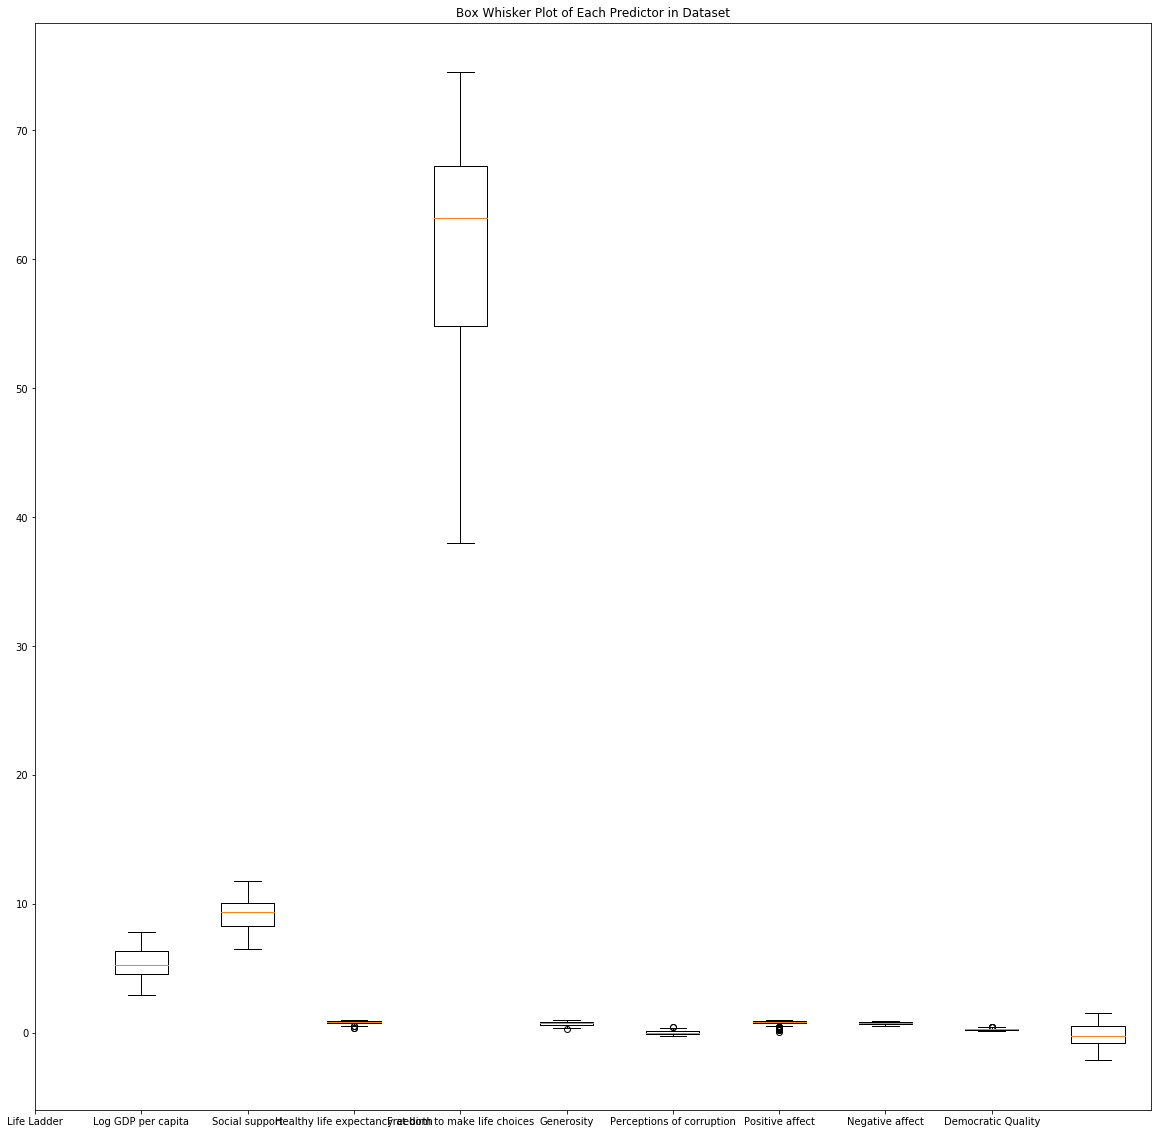

In [235]:
plt.figure(figsize=(20, 20))
plt.boxplot([predictors[col] for col in predictors.columns])
plt.title("Box Whisker Plot of Each Predictor in Dataset")
plt.xticks(range(len(predictors.columns.values)), predictors.columns.values)
plt.show()

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

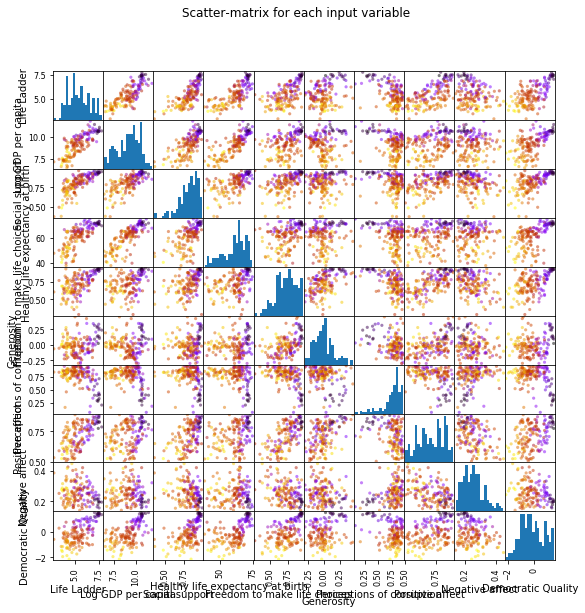

In [236]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
#feature_names = ['Life ladder', 'Generosity', 'Negative Affect', 'Democratic Quality']
X = predictors
y = target
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=10, hist_kwds={'bins':20}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')


In [237]:
import json
#Read data to json.
merged_json = json.loads(fragile_target_happiness.to_json())
#Convert to String like object.
json_data = json.dumps(merged_json)

In [238]:
target = pd.cut(target, bins=[0, 29, 59, 89, 120],
                     labels =[0, 1, 2, 3])

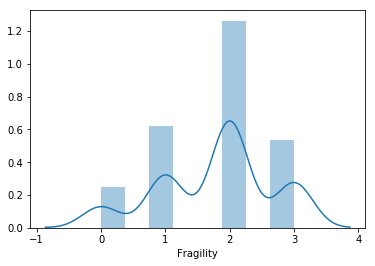

In [239]:
sns.distplot(target)

In [240]:
predictors = predictors.apply(lambda x: x.fillna(x.median()),axis=0)

In [241]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)    
X_test = scaler.transform(X_test)

# Dummy Classifier 

In [242]:
#Baseline Performance 
from sklearn.dummy import DummyClassifier
dum_clf = DummyClassifier(strategy= 'most_frequent').fit(X_train, y_train)
y_pred = dum_clf.predict(X_test)

print('Actual Fragility :  \n'+ str(y_test.value_counts()))
print('Baseline Predicted Fragility : \n' + str(pd.Series(y_pred).value_counts()))

Actual Fragility :  
2    13
3    10
1     8
0     7
Name: Fragility, dtype: int64
Baseline Predicted Fragility : 
2    38
dtype: int64


# **Logistic Regression**

In [243]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))

Accuracy of Logistic regression classifier on test set: 0.45
Accuracy of Logistic regression classifier on training set: 0.65


In [244]:
from sklearn.model_selection import cross_val_score

logreg_cv_score = cross_val_score(logreg, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(logreg_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 58.19%


In [245]:
# Evaluation

In [246]:
from sklearn.metrics import confusion_matrix
log_pred = logreg.predict(X_test)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,log_pred)))
#Largely Type I errors, False positives 

Confusion Matrix : 
[[ 0  7  0  0]
 [ 0  3  5  0]
 [ 0  0 13  0]
 [ 0  0  9  1]]


In [247]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.30      0.38      0.33         8
           2       0.48      1.00      0.65        13
           3       1.00      0.10      0.18        10

    accuracy                           0.45        38
   macro avg       0.45      0.37      0.29        38
weighted avg       0.49      0.45      0.34        38



# Decision Tree

In [248]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on test set: 0.71
Accuracy of Decision Tree classifier on training set: 1.00


In [249]:
dclf_cv_score = cross_val_score(clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dclf_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 66.18%


In [250]:
clf_pred = clf.predict(X_test)
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,clf_pred)))
#Decision tree confusion matrix has less 

Confusion Matrix : 
[[7 0 0 0]
 [1 4 3 0]
 [0 4 8 1]
 [0 0 2 8]]


In [121]:
print(classification_report(y_test, clf_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.67      0.50      0.57         8
           2       0.62      0.77      0.69        13
           3       0.88      0.70      0.78        10

    accuracy                           0.74        38
   macro avg       0.76      0.74      0.74        38
weighted avg       0.75      0.74      0.73        38



# K-Nearest Neighbors 

In [212]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of K-NN classifier on test set: 0.82
Accuracy of K-NN classifier on training set: 0.84


In [213]:
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(knn_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 72.48%


In [214]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.62      0.77         8
           2       0.65      1.00      0.79        13
           3       1.00      0.60      0.75        10

    accuracy                           0.82        38
   macro avg       0.91      0.81      0.83        38
weighted avg       0.88      0.82      0.81        38



In [215]:
# Since KNN best performing model; will fine tune model using Grid Search 

from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors': [1, 2, 3, 11],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}
              
#Fit the model 
knn_grid_search = GridSearchCV(knn, param_grid=parameters, cv=10, scoring='accuracy', n_jobs = -1)
knn_grid_search.fit(X_train, y_train)

#Predictions on test data
#prediction=model.predict(X_test)
#k_range = list(range(1, 31))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 11],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [216]:
# knn_grid_search.cv_results_

In [217]:
knn_grid_search.best_score_

0.7767857142857143

In [218]:
knn_grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

In [219]:
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,knn_pred)))

Confusion Matrix : 
[[ 7  0  0  0]
 [ 0  5  3  0]
 [ 0  0 13  0]
 [ 0  0  4  6]]


In [254]:
#Want to visualize confusion 

# cnf_matrix = confusion_matrix(y_test, knn_pred, labels=['Sustainable', 'Stable', 'Warning', 'Alert'])
# np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes= ['Sustainable', 'Stable', 'Warning', 'Alert'],
#                       title='Confusion matrix, without normalization')

# Linear Discriminant Analysis  

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

Accuracy of LDA classifier on test set: 0.87
Accuracy of LDA classifier on training set: 0.88


In [80]:
lda_cv_score = cross_val_score(lda, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(lda_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 75.13%


In [81]:
lda_pred = lda.predict(X_test)
print(classification_report(y_test, lda_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.88      0.93         8
           2       0.75      0.92      0.83        13
           3       0.88      0.70      0.78        10

    accuracy                           0.87        38
   macro avg       0.91      0.87      0.88        38
weighted avg       0.88      0.87      0.87        38



# Random Forest 

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(forest.score(X_test, y_test)))
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(forest.score(X_train, y_train)))

Accuracy of Random Forest classifier on test set: 0.79
Accuracy of Random Forest classifier on training set: 1.00


In [83]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

Text(0, 0.5, 'Feature')

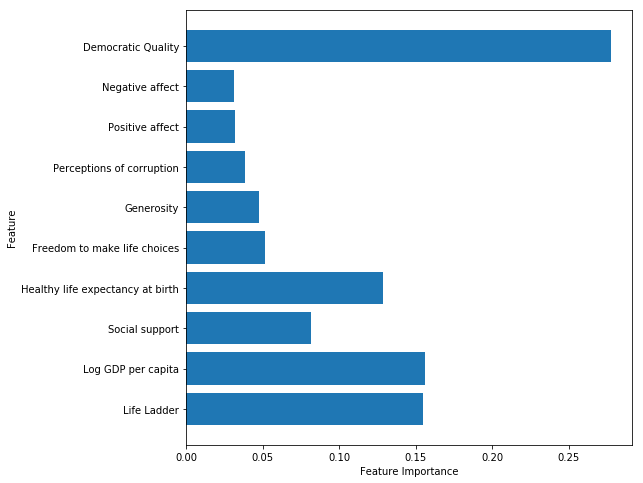

In [171]:
n_features = X_train.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), forest.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), predictors.columns.values) 
plt.xlabel("Feature Importance")
plt.ylabel("Feature")

In [85]:
forest.feature_importances_

array([0.15496816, 0.15602192, 0.08162827, 0.12864962, 0.05141976,
       0.04778937, 0.03837405, 0.03173773, 0.03163345, 0.27777769])

In [146]:
forest_cv_score = cross_val_score(forest, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(forest_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_dt_cv_score * 100))

Mean Cross Validation Score: 75.89%


In [147]:
forest_pred = forest.predict(X_test)
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.62      0.77         8
           2       0.65      1.00      0.79        13
           3       1.00      0.60      0.75        10

    accuracy                           0.82        38
   macro avg       0.91      0.81      0.83        38
weighted avg       0.88      0.82      0.81        38



# XGBoost

In [172]:
#Did not think to use XGBoost due to competitive of KNN 